In [70]:
import gym
from gym import spaces
import numpy as np
from numpy import random
import seaborn
import time
import matplotlib.pyplot as plt
import time

# PART I

The environment that we defined is called the "GameEnv". It is a 4x4 grid world where the agent moves around to collect rewards, avoid pitfalls, and reach the goal to collect a final reward.

**Actions**

The agent has 4 possible actions:

- Move right
- Move left
- Move up
- Move down

**States**

The states are represented by a 4x4 grid where each cell can have one of the following values:

+ 1 if the agent is present in that cell
+ 0.8 if the cell contains the target goal position
+ 0.6 if the cell contains the +5 gold coin
+ 0.4 if the cell contains the +4 gold coin
+ 0.2 if the cell contains the -7 pitfall
+ 0.1 if the cell contains the -6 pitfall

**Rewards**

The agent receives different rewards based on the state it moves to after taking an action:

- +20 if the agent reaches the target goal position
- +5 or +4 if the agent reaches the respective gold coins
- -7 or -6 if the agent enters the respective pitfalls

**Objective**

The main objective of the agent is to navigate through the grid world and reach the target goal position while collecting the largest possible reward.


In [71]:
class GameEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        self.action_space = spaces.Discrete(4) 
        self.observation_space = spaces.Discrete(16)  
        self.max_timesteps = 20
        
        
    def step(self, action):

        #self.state = np.random.choice(self.observation_space.n)
        done = False # initialize done to False
        if action == 0:
            self.agent_pos[0] += 1  #down
        if action == 1:
            self.agent_pos[0] -= 1  #up
        if action == 2:
            self.agent_pos[1] += 1  #right
        if action == 3:
            self.agent_pos[1] -= 1  #left

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))     
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.5
        self.state[tuple(self.pit1_pos)] = 0.2
        self.state[tuple(self.pit2_pos)] = 0.1
        self.state[tuple(self.agent_pos)] = 1.0
        observation = self.state.flatten()
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 20 #Target position: Given big reward if it reaches target
            done = True   #stops the agent from continuing to move (terminal state)
            print("\nTerminal State reached!\n")

        elif (self.agent_pos == self.pit1_pos).all():
            reward = -7 #A negative reward of -6 if it enters pitfall

        elif (self.agent_pos == self.pit2_pos).all():
            reward = -6 #A negative reward of -6 if it enters pitfall
            
        elif (self.agent_pos == self.coin1_pos).all():
            reward = +5 #A reward of +5
            self.coin1_pos = [-1,-1]  #removes the coin once collected

        elif (self.agent_pos == self.coin2_pos).all():
            reward = +4 #A reward of +5
            self.coin2_pos = [-1,-1]  #removes the coin once collected

            
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
            done = True
        info = {}
        return observation, reward, done, info
    


    def reset(self):
        
        self.timestep = 0
        self.state = np.zeros((4,4))
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]       
        self.pit1_pos = [2,0]
        self.pit2_pos = [2,3]
        self.coin1_pos = [1,1]
        self.coin2_pos = [1,3] 

        
        self.state[tuple(self.agent_pos)] = 1.0
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.4
        self.state[tuple(self.pit1_pos)] = 0.2
        self.state[tuple(self.pit2_pos)] = 0.1
        observation = self.state.flatten()
        return observation

    def render(self):
        plt.imshow(self.state)
       

In [72]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
    
    def step(self, observation):
        return np.random.choice(self.action_space.n)

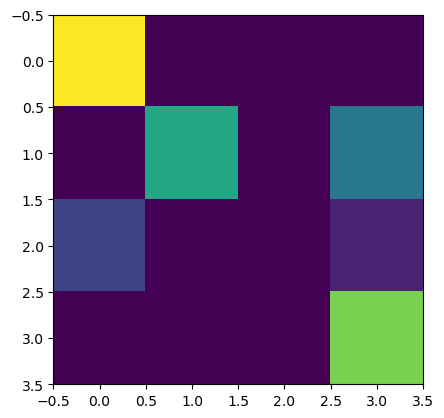

In [73]:
envview = GameEnv()
envview.reset()
envview.render()

Step 1
Chosen action:  2 (Right)
Observation:  [0.  1.  0.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 2
Chosen action:  1 (Up)
Observation:  [0.  1.  0.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 3
Chosen action:  3 (Left)
Observation:  [1.  0.  0.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 4
Chosen action:  3 (Left)
Observation:  [1.  0.  0.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 5
Chosen action:  1 (Up)
Observation:  [1.  0.  0.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 6
Chosen action:  3 (Left)
Observation:  [1.  0.  0.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 7
Chosen action:  2 (Right)
Observation:  [0.  1.  0.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 8
Chosen action:  1 (Up)
Observation:  [0.  1.  0.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step

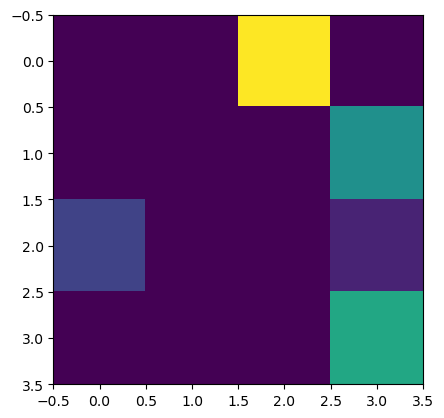

In [74]:
envtest = GameEnv()
envtest.reset()

agent = RandomAgent(envtest)

obs = envtest.reset()
done = False
step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

rwd=0
step=0
while not done:
    step=step+1
    print("Step",step)
    action = agent.step(obs)
    print("Chosen action: ", action, step_labels[action])
    observation, reward, done, info = envtest.step(action)
    rwd+=reward
    print("Observation: ", observation)
    print("Reward: ", reward,'\n')
    #print("Info", info)
    envtest.render()
    
print("Total Reward:", rwd)


# PART 2

In [75]:
env = GameEnv()
env.reset()
epsilon = 0.5
total_episodes = 1000
alpha = 0.8
gamma = 0.9
step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

total_reward =[]
total_loss=[]
step_count=0
avg_steps=[]

def greedyEp(state, Q):
    if np.random.uniform(0, 1) < epsilon:
        act = np.random.choice(env.action_space.n)
        #print("chosen random")
    else:
        #print("chosen greedy")
        act = np.argmax(Q[np.where(state==1)[0][0]][:])
    return act

#Initializing the Q table
Q= np.zeros((env.observation_space.n, env.action_space.n))

for episode in range(total_episodes):
    print("Episode:", episode+1)
    ep_reward=0
    step=0
    state = env.reset()
    done=False
 
    while not done:
        step=step+1
        action = greedyEp(state, Q)
        #print("Chosen action: ", action, step_labels[action])

 
        next_state, reward, done, info= env.step(action)
        #print("Observation: ", next_state)
        #print("Reward: ", reward,'\n')
 
        #Choosing the next action
        next_action = greedyEp(next_state, Q)
        #print("Next action: ", next_action, step_labels[next_action])

    
        #Calculating new Q table row at this state
        prediction = Q[np.where(state==1)[0][0]][action]
        target = reward + gamma * Q[np.where(next_state==1)[0][0]][next_action]
        loss=target - prediction
        avg_loss +=loss
        Q[np.where(state==1)[0][0]][action] = Q[np.where(state==1)[0][0]][action] + alpha * loss
        #print("Prediction:",prediction, "New value:", V[np.where(state==1)[0][0]][action])
        state = next_state
        action = next_action
         
        #Tracking reward
        ep_reward =ep_reward+ reward
      
         #decay epsilon
        if epsilon > 0.01:
            epsilon =epsilon*decay
            
    step_count+=step       
    total_reward.append(ep_reward)
    print("Total reward for this episode:", ep_reward,"\n")
    total_loss.append(avg_loss/20)
    if (episode%100==0):
        avg_steps.append(step_count/100)
        step_count=0
        print(Q)    
    #env.render()

Episode: 1
Total reward for this episode: -21 

[[ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [-5.6    0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [-4.032  0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.    -6.72   0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]]
Episode: 2

Terminal State reached!

Total reward for this episode: 25 

Episode: 3
Total reward for this episode: -9 

Episode: 4
Total reward for this episode: 5 

Episode: 5
Total reward for this episode: -9 

Episode: 6
Total reward for this episode: 5 

Episode: 7
Total reward for this episode: 5 

Episode: 8
Total reward for this episode: 5 

Episode: 9
Total reward for this episode: 5 

Episode: 10
Total reward for this episode: 0 

Episode: 11

Total reward for this episode: 5 

Episode: 586
Total reward for this episode: 5 

Episode: 587
Total reward for this episode: 5 

Episode: 588

Terminal State reached!

Total reward for this episode: 25 

Episode: 589

Terminal State reached!

Total reward for this episode: 25 

Episode: 590

Terminal State reached!

Total reward for this episode: 25 

Episode: 591

Terminal State reached!

Total reward for this episode: 25 

Episode: 592

Terminal State reached!

Total reward for this episode: 25 

Episode: 593

Terminal State reached!

Total reward for this episode: 25 

Episode: 594

Terminal State reached!

Total reward for this episode: 25 

Episode: 595

Terminal State reached!

Total reward for this episode: 25 

Episode: 596

Terminal State reached!

Total reward for this episode: 25 

Episode: 597

Terminal State reached!

Total reward for this episode: 25 

Episode: 598

Terminal State reached!

Total reward for this episode: 25 

Episode: 599

Terminal State reached!

Total

Total reward for this episode: 5 

Episode: 958
Total reward for this episode: 5 

Episode: 959
Total reward for this episode: 5 

Episode: 960
Total reward for this episode: 5 

Episode: 961
Total reward for this episode: 5 

Episode: 962
Total reward for this episode: 5 

Episode: 963
Total reward for this episode: 5 

Episode: 964
Total reward for this episode: 5 

Episode: 965
Total reward for this episode: 5 

Episode: 966
Total reward for this episode: 5 

Episode: 967
Total reward for this episode: 5 

Episode: 968
Total reward for this episode: 5 

Episode: 969
Total reward for this episode: 5 

Episode: 970
Total reward for this episode: 5 

Episode: 971
Total reward for this episode: 5 

Episode: 972
Total reward for this episode: 5 

Episode: 973
Total reward for this episode: 5 

Episode: 974
Total reward for this episode: 5 

Episode: 975
Total reward for this episode: 5 

Episode: 976
Total reward for this episode: 5 

Episode: 977
Total reward for this episode: 5 

Episo

In [76]:
# epsilon = 0.1
# def greedyEp(state, V):
#     if np.random.uniform(0, 1) < epsilon:
#         act = np.random.choice(env.action_space.n)
#         print("chosen random")
#     else:
#         print("chosen greedy")
#         print(np.where(state==1)[0][0])
#         act = np.argmax(V[np.where(state==1)[0][0]][:])
#     return act
# V=np.zeros((4,4))
# state=env.reset()
# print(state)
# greedyEp(state, V)

In [77]:
# env = GameEnv()
# env.reset()
# epsilon = 0.6
# decay = 0.9954
# total_episodes = 1000
# alpha = 0.2
# gamma = 0.9
# step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

# total_reward =[]
# total_loss=[]
# step_count=0
# avg_steps=[]

# def greedyEp(state, V):
#     if np.random.uniform(0, 1) < epsilon:
#         act = np.random.choice(env.action_space.n)
#         #print("chosen random")
#     else:
#         #print("chosen greedy")
#         act = np.argmax(V[np.where(state==1)[0][0]//4][:])
#     return act

# #Initializing the value function
# V = np.zeros((4,4))

# for episode in range(total_episodes):
#     avg_loss=0
#     print("Episode:", episode+1)
#     ep_reward=0
#     step=0
#     state = env.reset()
#     done=False
 
#     while not done:
#         step=step+1
#         action = greedyEp(state, V)
#         #print("Chosen action: ", action, step_labels[action])

 
#         next_state, reward, done, info= env.step(action)
#         #print("Observation: ", next_state)
#         #print("Reward: ", reward,'\n')
 
#         #Generate next action
#         next_action = greedyEp(next_state, V)
#         #print("Next action: ", next_action, step_labels[next_action])

    
#         # Calculate new value function at this state
#         # Agent is at the location where state value is 1. Since state is a flattened 1x16 array, if the 1 is at index 7,
#         # this corresponds to second row (7//4) and tuird column (7%4) of the 4x4 value function array
#         square=np.where(state==1)[0][0]
#         row=square//4
#         column=square%4
#         next_square=np.where(next_state==1)[0][0]
#         nrow=next_square//4
#         ncolumn=next_square%4
        
#         prediction = V[row][column]
#         target = reward + gamma * V[nrow][ncolumn]
#         loss=target - prediction
#         avg_loss +=loss
#         V[row][column] = V[row][column] + alpha * loss
#         #print("Prediction:",prediction, "New value:", V[nrow][ncolumn])
#         state = next_state
#         action = next_action
         
#         #Tracking reward
#         ep_reward =ep_reward+ reward
        
#          #decay epsilon
#         if epsilon > 0.01:
#             epsilon =epsilon*decay
#     step_count+=step
#     total_reward.append(ep_reward)
#     print("Total reward for this episode:", ep_reward,"\n")
#     total_loss.append(avg_loss/20)
#     if (episode%100==0):
#         avg_steps.append(step_count/100)
#         step_count=0
#         print(V)
#     #env.render()

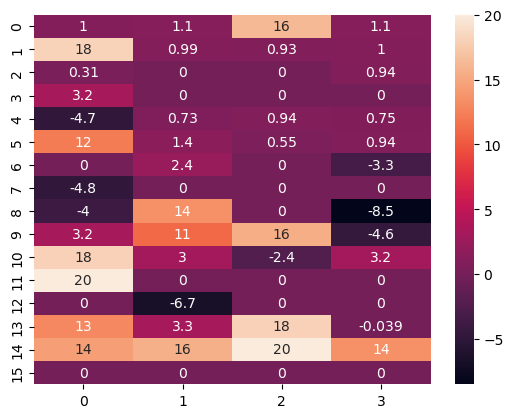

In [78]:
seaborn.heatmap(Q, annot=True)
plt.show()

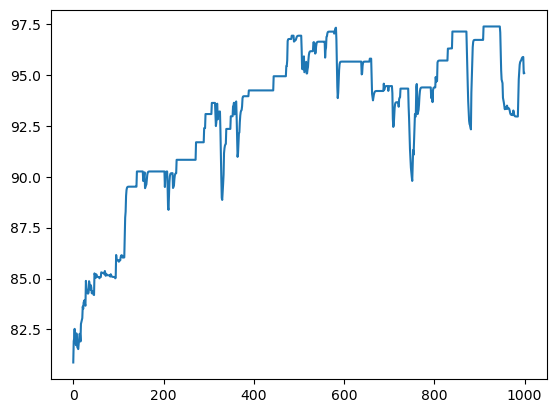

In [79]:
plt.plot(total_loss)
plt.show()

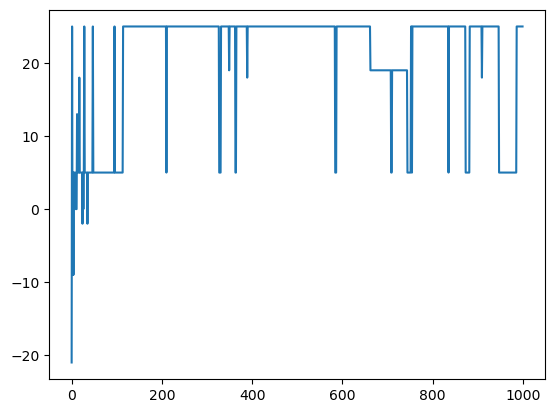

In [80]:
plt.plot(total_reward)
plt.show()

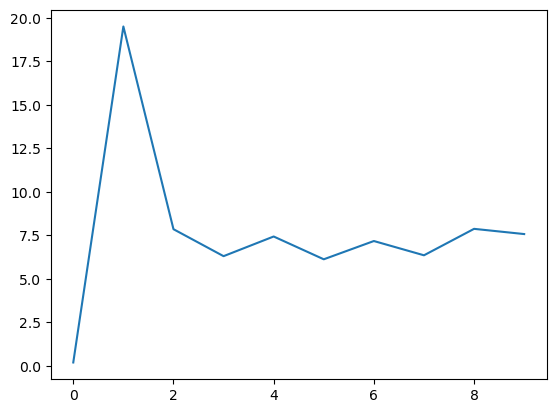

Text(0.5, 1.0, 'Average step count every 100 episodes')

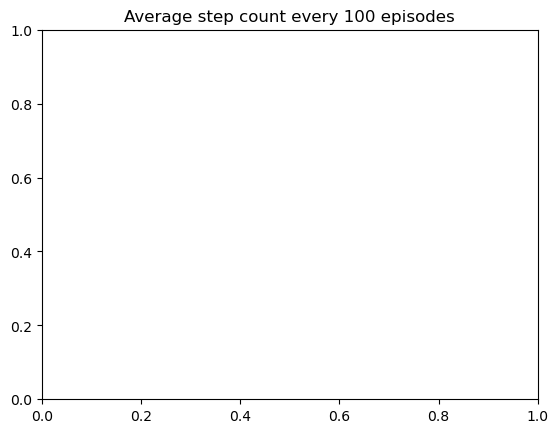

In [81]:
plt.plot(avg_steps)
plt.show()
plt.title("Average step count every 100 episodes")

References
1. RL textbook: http://incompleteideas.net/book/RLbook2020.pdf
2. Random Agent class demo
3. Q-learning vs SARSA (reference only): https://towardsdatascience.com/q-learning-and-sasar-with-python-3775f86bd178
4. 